In [1]:
# import required libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
# Reading in the data
dass_data <- read_csv("dass_data.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  country = col_character(),
  major = col_character()
)

See spec(...) for full column specifications.



In [3]:
# names in the raw data
names(dass_data)

#Preview the data
head(dass_data)

#Number of rows in the data
nrow(dass_data)

[1] "Q1A"                   "Q1I"                   "Q1E"                  
  [4] "Q2A"                   "Q2I"                   "Q2E"                  
  [7] "Q3A"                   "Q3I"                   "Q3E"                  
 [10] "Q4A"                   "Q4I"                   "Q4E"                  
 [13] "Q5A"                   "Q5I"                   "Q5E"                  
 [16] "Q6A"                   "Q6I"                   "Q6E"                  
 [19] "Q7A"                   "Q7I"                   "Q7E"                  
 [22] "Q8A"                   "Q8I"                   "Q8E"                  
 [25] "Q9A"                   "Q9I"                   "Q9E"                  
 [28] "Q10A"                  "Q10I"                  "Q10E"                 
 [31] "Q11A"                  "Q11I"                  "Q11E"                 
 [34] "Q12A"                  "Q12I"                  "Q12E"                 
 [37] "Q13A"                  "Q13I"                  "Q13E"                 
 [40] "Q14A"                  "Q14I"                  "Q14E"                 
 [43] "Q15A"                  "Q15I"                  "Q15E"                 
 [46] "Q16A"                  "Q16I"                  "Q16E"                 
 [49] "Q17A"                  "Q17I"                  "Q17E"                 
 [52] "Q18A"                  "Q18I"                  "Q18E"                 
 [55] "Q19A"                  "Q19I"                  "Q19E"                 
 [58] "Q20A"                  "Q20I"                  "Q20E"                 
 [61] "Q21A"                  "Q21I"                  "Q21E"                 
 [64] "Q22A"                  "Q22I"                  "Q22E"                 
 [67] "Q23A"                  "Q23I"                  "Q23E"                 
 [70] "Q24A"                  "Q24I"                  "Q24E"                 
 [73] "Q25A"                  "Q25I"                  "Q25E"                 
 [76] "Q26A"                  "Q26I"                  "Q26E"                 
 [79] "Q27A"                  "Q27I"                  "Q27E"                 
 [82] "Q28A"                  "Q28I"                  "Q28E"                 
 [85] "Q29A"                  "Q29I"                  "Q29E"                 
 [88] "Q30A"                  "Q30I"                  "Q30E"                 
 [91] "Q31A"                  "Q31I"                  "Q31E"                 
 [94] "Q32A"                  "Q32I"                  "Q32E"                 
 [97] "Q33A"                  "Q33I"                  "Q33E"                 
[100] "Q34A"                  "Q34I"                  "Q34E"                 
[103] "Q35A"                  "Q35I"                  "Q35E"                 
[106] "Q36A"                  "Q36I"                  "Q36E"                 
[109] "Q37A"                  "Q37I"                  "Q37E"                 
[112] "Q38A"                  "Q38I"                  "Q38E"                 
[115] "Q39A"                  "Q39I"                  "Q39E"                 
[118] "Q40A"                  "Q40I"                  "Q40E"                 
[121] "Q41A"                  "Q41I"                  "Q41E"                 
[124] "Q42A"                  "Q42I"                  "Q42E"                 
[127] "country"               "source"                "introelapse"          
[130] "testelapse"            "surveyelapse"          "TIPI1"                
[133] "TIPI2"                 "TIPI3"                 "TIPI4"                
[136] "TIPI5"                 "TIPI6"                 "TIPI7"                
[139] "TIPI8"                 "TIPI9"                 "TIPI10"               
[142] "VCL1"                  "VCL2"                  "VCL3"                 
[145] "VCL4"                  "VCL5"                  "VCL6"                 
[148] "VCL7"                  "VCL8"                  "VCL9"                 
[151] "VCL10"                 "VCL11"                 "VCL12"                
[154] "VCL13"           

Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,⋯,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
4,28,3890,4,25,2122,2,16,1944,4,⋯,1,1,1,12,1,10,2,1,2,NA
4,2,8118,1,36,2890,2,35,4777,3,⋯,2,1,2,7,0,70,2,1,4,NA
3,7,5784,1,33,4373,4,41,3242,1,⋯,2,1,1,4,3,60,1,1,3,NA
2,23,5081,3,11,6837,2,37,5521,1,⋯,2,1,2,4,5,70,2,1,5,biology
2,36,3215,2,13,7731,3,5,4156,4,⋯,2,2,3,10,1,10,2,1,4,Psychology
1,18,6116,1,28,3193,2,2,12542,1,⋯,2,1,1,4,1,70,2,1,4,NA


[1] 39775

In [4]:
# Data Cleaning with VCL (VCL6, VCL9, and VCL12 are not real words)
dass_valid <- dass_data %>% filter((VCL6 == 0) & (VCL9 == 0) & (VCL12 == 0))
dass_valid$VCL6

# Number of rows in data to show how many rows were removed
nrow(dass_valid)

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [37] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [73] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [109] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [145] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [181] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [217] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [253] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [289] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [325] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [361] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [397] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [433] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [469] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [505] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [541] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [577] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [613] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [649] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [685] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [721] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [757] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [793] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [829] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [865] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [901] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [937] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [973] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1009] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1045] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1081] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1117] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1153] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1189] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1225] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1261] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1333] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1369] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1405] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1441] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1477] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1513] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1549] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1585] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1621] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1657] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1693] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1729] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1765] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [18

[1] 34583

In [5]:
# Removing surveys that took too long or too short
test_time <- quantile(dass_valid$testelapse, probs = seq(0.05, 1, 0.05))
survey_time <- quantile(dass_valid$surveyelapse, probs = seq(0.05, 1, 0.05))
test_time
survey_time

5%        10%        15%        20%        25%        30%        35% 
     119.0      135.0      147.0      158.0      168.0      177.0      187.0 
       40%        45%        50%        55%        60%        65%        70% 
     196.0      206.0      217.0      229.0      242.0      257.0      276.0 
       75%        80%        85%        90%        95%       100% 
     300.0      332.0      380.0      470.0      702.9 20829721.0

5%      10%      15%      20%      25%      30%      35%      40% 
     100      117      129      139      147      155      163      171 
     45%      50%      55%      60%      65%      70%      75%      80% 
     179      188      197      207      219      232      250      272 
     85%      90%      95%     100% 
     305      363      508 20828454

In [6]:
# Filtering out the lower and top 5% of the data for response time
dass_valid <- dass_valid %>% filter((testelapse > test_time["5%"])&(testelapse < test_time["95%"])&
                                    (surveyelapse > survey_time["5%"])&(surveyelapse < survey_time["95%"]))

# Number of rows in data to show how many rows were removed
nrow(dass_valid)

[1] 28433

In [7]:
# country and major has missing values
names(which(colSums(is.na(dass_valid))>0))

[1] "country" "major"

In [8]:
# Selecting the useful columns (removing un-needed columns)
# dass_selected <- dass_valid %>% select(!starts_with("VCL") & !ends_with("E") & !ends_with("I"),
#                                        -source, -screensize, -introelapse, -testelapse, -surveyelapse, -uniquenetworklocation, -country, -major)

# Removed meta irrelevant data columns, leaving only the QA questions, TIPIs, education and age
dass_selected <- dass_data %>%
    select(ends_with("A") | starts_with("TIPI"), education, age)
names(dass_selected)


[1] "Q1A"       "Q2A"       "Q3A"       "Q4A"       "Q5A"       "Q6A"      
 [7] "Q7A"       "Q8A"       "Q9A"       "Q10A"      "Q11A"      "Q12A"     
[13] "Q13A"      "Q14A"      "Q15A"      "Q16A"      "Q17A"      "Q18A"     
[19] "Q19A"      "Q20A"      "Q21A"      "Q22A"      "Q23A"      "Q24A"     
[25] "Q25A"      "Q26A"      "Q27A"      "Q28A"      "Q29A"      "Q30A"     
[31] "Q31A"      "Q32A"      "Q33A"      "Q34A"      "Q35A"      "Q36A"     
[37] "Q37A"      "Q38A"      "Q39A"      "Q40A"      "Q41A"      "Q42A"     
[43] "TIPI1"     "TIPI2"     "TIPI3"     "TIPI4"     "TIPI5"     "TIPI6"    
[49] "TIPI7"     "TIPI8"     "TIPI9"     "TIPI10"    "education" "age"

In [9]:
# Creating our target variable (average of all Q responses), dropping the Q responses

dass_clean <- dass_selected %>% mutate(avg = rowMeans(select(dass_selected, starts_with("Q")))) %>% select(!starts_with("Q"))
names(dass_clean)

# Now we only have 28433 rows and 12 predictors and avg as our target variable

[1] "TIPI1"     "TIPI2"     "TIPI3"     "TIPI4"     "TIPI5"     "TIPI6"    
 [7] "TIPI7"     "TIPI8"     "TIPI9"     "TIPI10"    "education" "age"      
[13] "avg"

In [10]:
head(dass_clean)

TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,age,avg
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,7,7,7,7,7,5,1,1,2,16,3.404762
6,5,4,7,5,4,7,7,1,5,2,16,2.619048
2,5,2,2,5,6,5,5,3,2,2,17,2.619048
1,1,7,4,6,4,6,1,6,1,1,13,2.166667
2,5,3,6,5,5,5,6,3,3,3,19,3.404762
2,1,6,1,7,7,7,2,6,7,2,20,1.738095


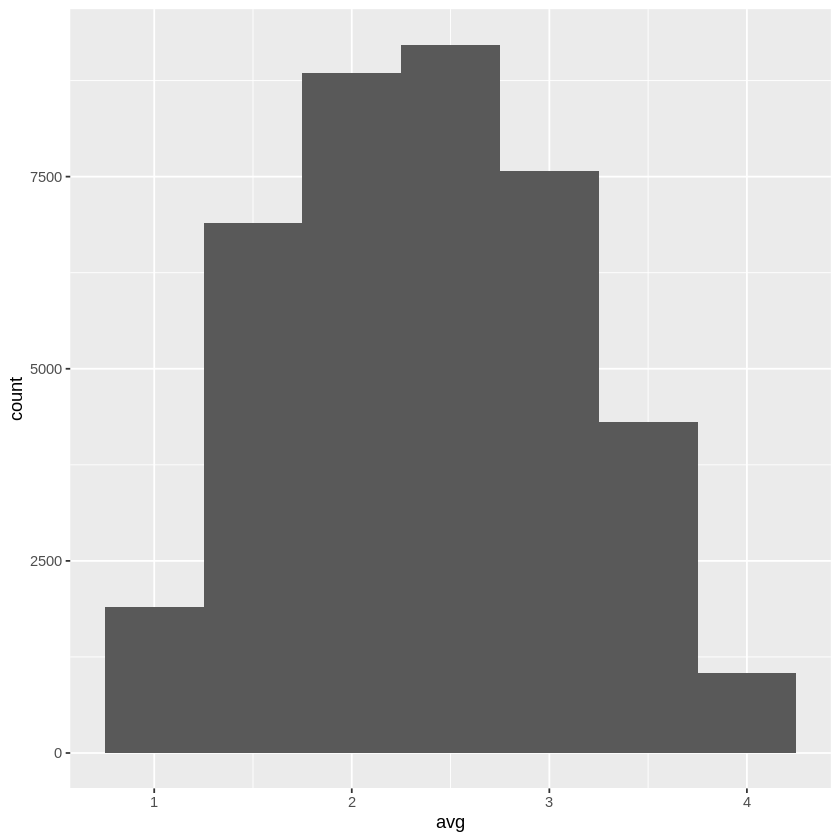

In [11]:
ggplot(dass_clean, aes(x=avg)) + geom_histogram(binwidth=0.5)

In [12]:
# Splitting the Data
dass_split <- initial_split(dass_clean, prop = 0.75, strata = avg)  
dass_train <- training(dass_split)   
dass_test <- testing(dass_split)

In [13]:
# knn regression
# Takes a VERY LONG time to run
set.seed(1234)

dass_recipe <- recipe(avg ~ ., data = dass_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

dass_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("regression")

dass_workflow <- workflow() %>%
    add_recipe(dass_recipe) %>%
    add_model(dass_spec_tune)

dass_vfold <- vfold_cv(dass_train, v = 2, strata = avg)

gridvals <- tibble(neighbors = seq(from = 1, to = 500, by = 100))

dass_results <- dass_workflow %>% tune_grid(resamples = dass_vfold, grid = gridvals) %>%
                    collect_metrics()



In [14]:
dass_min <- dass_results %>%
   filter(.metric == "rmse") %>%
   arrange(mean, std_err) %>% 
   slice(1)
dass_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
101,rmse,standard,0.5446243,2,0.002835041,Model2


In [15]:
dass_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,0.7436641,2,0.005185037,Model1
1,rsq,standard,0.2030227,2,0.008463013,Model1
101,rmse,standard,0.5446243,2,0.002835041,Model2
101,rsq,standard,0.4329791,2,0.011840405,Model2
201,rmse,standard,0.5481594,2,0.002458280,Model3
201,rsq,standard,0.4318655,2,0.011559698,Model3
301,rmse,standard,0.5508314,2,0.002254059,Model4
301,rsq,standard,0.4311650,2,0.011553472,Model4
401,rmse,standard,0.5530555,2,0.002051710,Model5


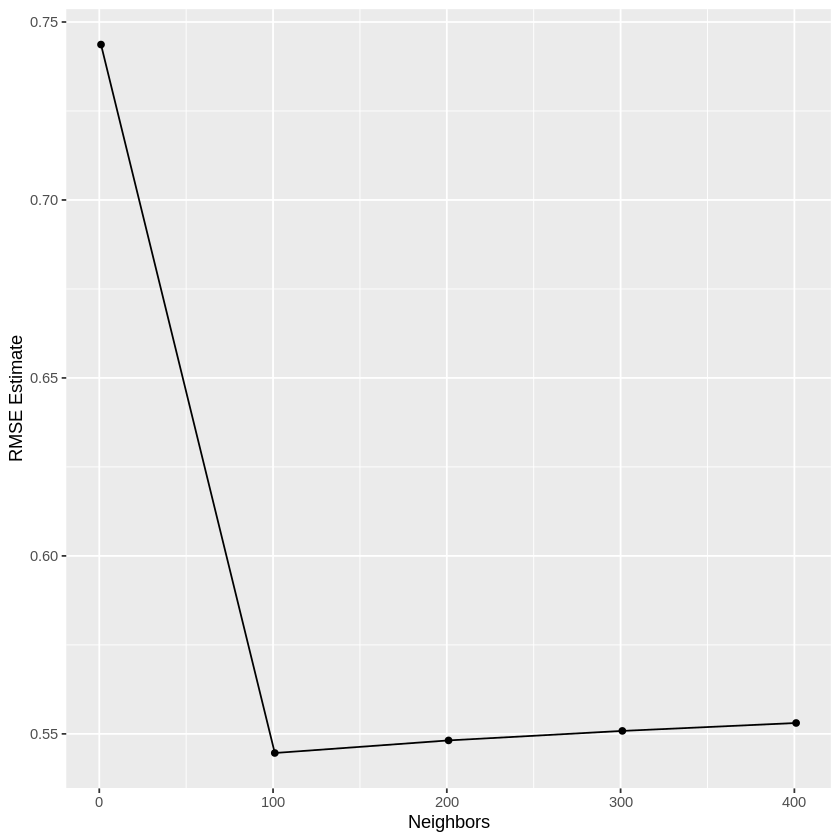

In [16]:
rmse_tune <- dass_results %>% 
      filter(.metric == "rmse")

rmse_versus_k <- ggplot(rmse_tune, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "RMSE Estimate") #+
#       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
#       scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
rmse_versus_k

In [17]:
#Further turning of the knn model
gridvals_200 <- tibble(neighbors = seq(from = 1, to = 200, by = 10))

dass_results_200 <- dass_workflow %>% tune_grid(resamples = dass_vfold, grid = gridvals_200) %>%
                    collect_metrics()

In [18]:
dass_min_final <- dass_results_200 %>%
   filter(.metric == "rmse") %>%
   arrange(mean, std_err) %>% 
   slice(1)
dass_min_final
# lets choose neighbors = 41 (we can tune further if we want but this should be good enough)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
41,rmse,standard,0.5419039,2,0.003565784,Model05


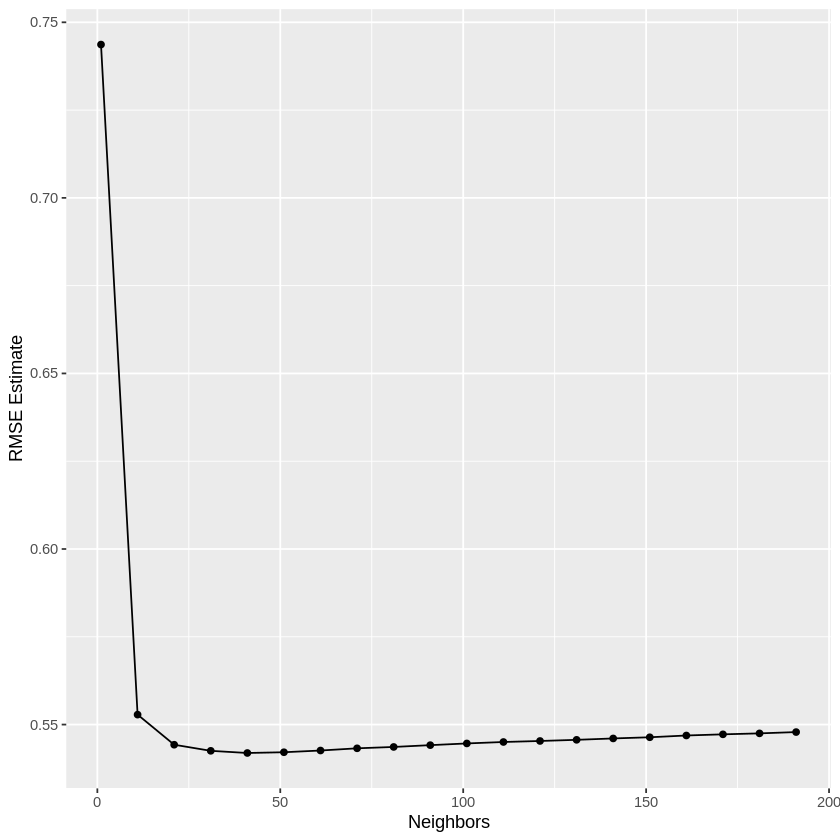

In [19]:
rmse_tune_final <- dass_results_200 %>% 
      filter(.metric == "rmse")

rmse_versus_k_final <- ggplot(rmse_tune_final, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "RMSE Estimate") #+
#       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
#       scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
rmse_versus_k_final

In [20]:
# Final Knn Model
set.seed(1234)

k_min <- dass_min_final %>%
         pull("neighbors") %>% as.integer()

dass_final_knn <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>%
         set_engine("kknn") %>%
         set_mode("regression")

dass_best_knn_fit <- workflow() %>%
         add_recipe(dass_recipe) %>%
         add_model(dass_final_knn) %>%
         fit(data = dass_train)

dass_summary <- dass_best_knn_fit %>%
          predict(dass_test) %>%
          bind_cols(dass_test) %>%
          metrics(truth = avg, estimate = .pred)

# your code here
dass_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.5338841
rsq,standard,0.4538549
mae,standard,0.4302408


In [22]:
# linear regression
lm_spec <- linear_reg() %>%
            set_engine("lm") %>%
            set_mode("regression")

lm_recipe <- recipe(avg ~ ., data = dass_train)

lm_fit <- workflow() %>%
  add_recipe(lm_recipe) %>%
  add_model(lm_spec) %>%
  fit(data = dass_train)

lm_test_results <- lm_fit %>%
  predict(dass_test) %>%
  bind_cols(dass_test) %>%
  metrics(truth = avg, estimate = .pred)

lm_test_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.5381396
rsq,standard,0.4380761
mae,standard,0.4309701
